# Part 5: Feature Selection

In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFpr

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("energy_consumption.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 33 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [3]:
df.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,week_of_day,week_status,NSM,week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Sunday,weekends,61200,2
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Sunday,weekends,61800,2
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Sunday,weekends,62400,2
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Sunday,weekends,63000,2
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Sunday,weekends,63600,2
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,Sunday,weekends,64200,2
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,Sunday,weekends,64800,2
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,Sunday,weekends,65400,2
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,Sunday,weekends,66000,2
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,Sunday,weekends,66600,2


## Removing features with low varaince


In [4]:
df = df.drop(['week_of_day','week_status','date'], axis=1)
df.shape

(19735, 30)

In [5]:
selector = VarianceThreshold(threshold=.5)
selector.fit_transform(df)
df.shape

(19735, 30)

## Univariate feature selection

In [6]:
y = df['Appliances']
x = df.drop(['Appliances'], axis=1)
x.shape

(19735, 29)

### Comparison of F-test and mutual information
http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

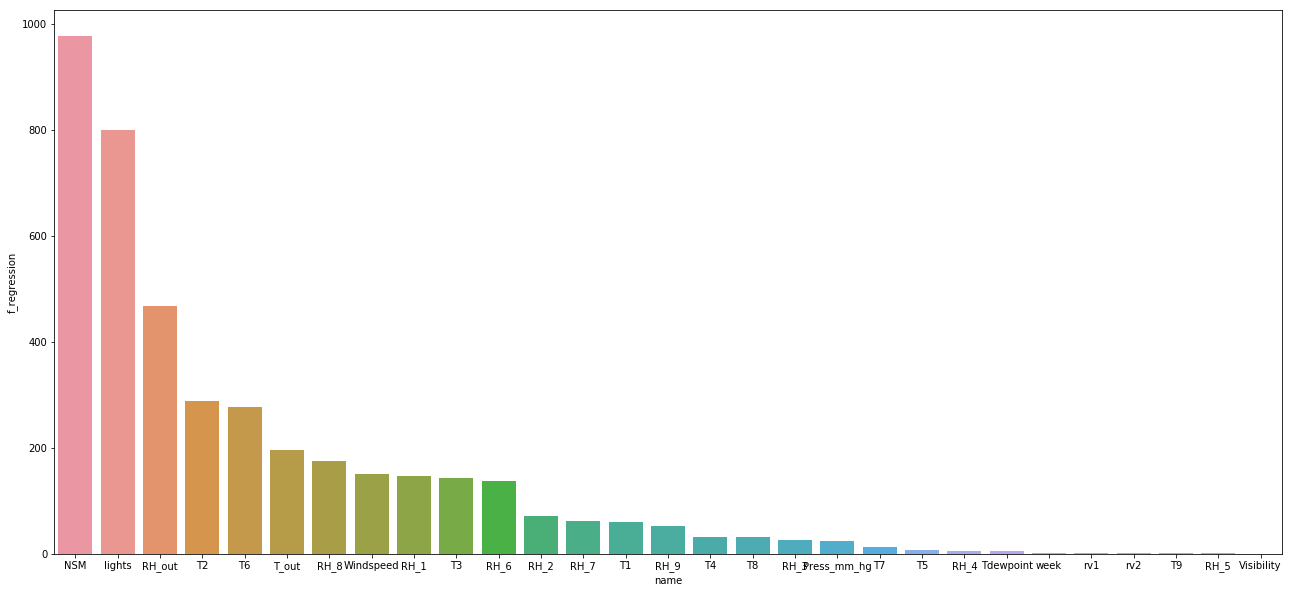

In [29]:
selector = SelectKBest(f_regression, k='all').fit(x,y)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores=list(zip(names,scores))
ns_df = pd.DataFrame(data = names_scores, columns=['name','f_regression'])
f_test_df = ns_df.sort_values('f_regression',ascending = False)

plt.figure(figsize=(22,10))
sns.barplot(x=f_test_df['name'], y=f_test_df['f_regression'])
plt.show()

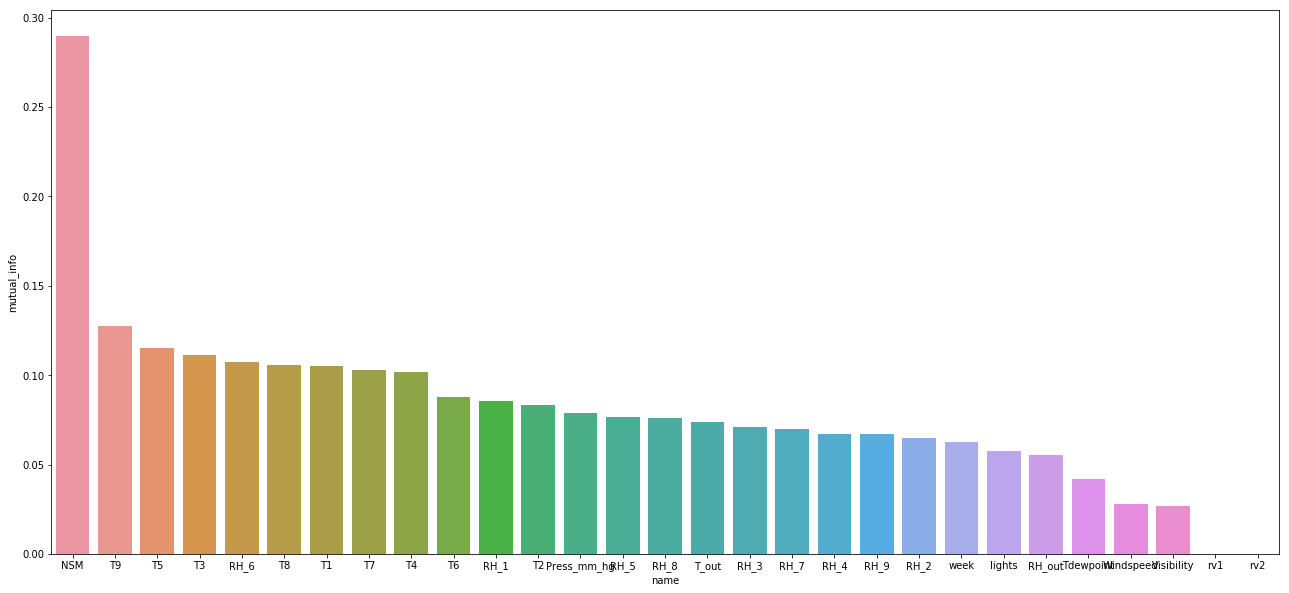

In [30]:
selector = SelectKBest(mutual_info_regression, k='all').fit(x,y)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores=list(zip(names,scores))
ns_df = pd.DataFrame(data = names_scores, columns=['name','mutual_info'])
mutual_info_df = ns_df.sort_values('mutual_info',ascending = False)

plt.figure(figsize=(22,10))
sns.barplot(x=mutual_info_df['name'], y=mutual_info_df['mutual_info'])
plt.show()

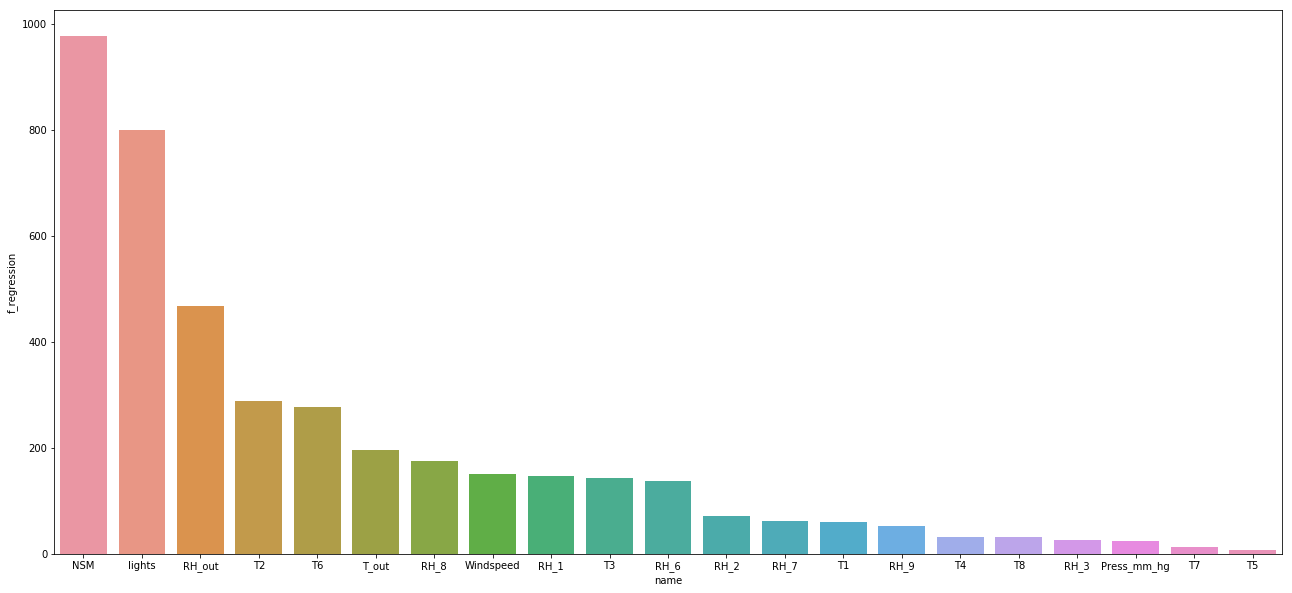

In [32]:
selector = SelectFpr(f_regression,alpha=0.01).fit(x,y)
names = x.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores=list(zip(names,scores))
ns_df = pd.DataFrame(data = names_scores, columns=['name','f_regression'])
fpr_df = ns_df.sort_values('f_regression',ascending = False)

plt.figure(figsize=(22,10))
sns.barplot(x='name', y='f_regression', data=fpr_df)
plt.show()

## Recursive feature elimination

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Feature selection using SelectFromModel